## Análise Exploratória de Dados

### Importaçao de bibliotecas

In [140]:
# Manipulação e Visualização de Dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Carregamento dos Dados

In [141]:
# Importação do Dataset
df_churn = pd.read_csv('../data/customer_churn_telecom_services.csv')

### Visualização Inicial do Dataset

In [142]:
df_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [143]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [144]:
df_churn.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Análise Inicial e Limpeza Básica

Verificar colunas identificadoras

In [145]:
# Seleciona as colunas que todos valores da coluna são únicos, ou seja, número de ocorrência de valores únicos igual a número de ocorrência de valores
col_iden = [col for col in df_churn.columns if df_churn[col].nunique() == df_churn[col].notna().sum()]
if col_iden:
    print("Colunas identificadoras detectadas:", col_iden)
else:
    print("Nenhuma coluna identificadora detectada.")

Nenhuma coluna identificadora detectada.


Verificar linhas duplicadas

In [146]:
num_dupli = df_churn.duplicated().sum()
print("Número de linhas duplicadas:", num_dupli)

Número de linhas duplicadas: 22


In [147]:
df_churn[df_churn.duplicated(keep=False)]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
22,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
100,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.20,No
542,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No
646,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.70,Yes
662,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,20.05,No
690,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,20.45,No
964,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.70,Yes
976,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.90,Yes
1243,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,45.30,45.30,Yes
1338,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes


Por não existir colunas identificadoras foi considerado quem as linhas duplicadas são ocorrências reais com características iguais, por isso foram mantidas.

Verificar linhas com valores nulos

In [148]:
df_churn[df_churn.isnull().any(axis=1)]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


A única coluna que possue valores nulos é a de 'TotalCharges' e após uma análise desses valores nulos foi possível identificar que todos ocorrem quando a coluna 'tenure' é 0, então foi considerado que quando o cliente está no primeiro mês (tenure = 0) e ainda não foi gerada a primeira fatura o 'TotalCharges' ainda é nulo, mas para nossa análise podemos considerá-lo como 0.

In [149]:
df_churn.loc[df_churn['tenure'] == 0, 'TotalCharges'] = 0

Tratamento dos valores nulos
 * Categóricas com a moda
 * Numéricas com a mediana

In [150]:
# Identificar colunas numéricas e categóricas
col_num = df_churn.select_dtypes(include=['int64', 'float64']).columns
col_cat = df_churn.select_dtypes(include=['object', 'category']).columns

# Preencher colunas numéricas com a mediana
for col in col_num:
    if df_churn[col].isnull().sum() > 0:
        med = df_churn[col].median()
        df_churn[col].fillna(med, inplace=True)
        print(f"Coluna '{col}' preenchida com a mediana: {med}")

# Preencher colunas categóricas com a moda
for col in col_cat:
    if df_churn[col].isnull().sum() > 0:
        mode = col_cat[col].mode()[0]
        df_churn[col].fillna(mode, inplace=True)
        print(f"Coluna '{col}' preenchida com a moda: {mode}")

### Análise da Variável-Alvo

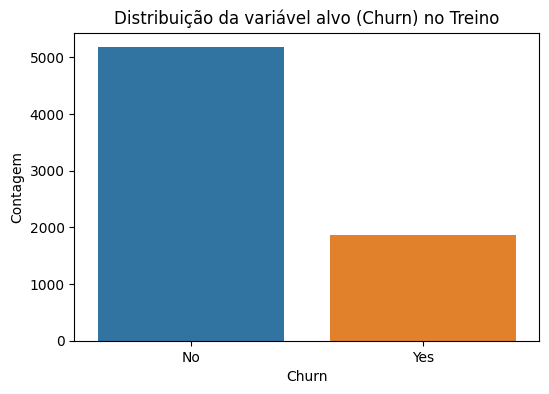

In [151]:
plt.figure(figsize=(6, 4))
sns.countplot(
    x="Churn",
    hue="Churn",
    data=df_churn,
    palette="tab10",      
    legend=False          
)
plt.title("Distribuição da variável alvo (Churn) no Treino")
plt.xlabel("Churn")
plt.ylabel("Contagem")
plt.show()


Possível notar grande predominancia de não evasão(Churn) nos contratos presentes nessa base de dados.

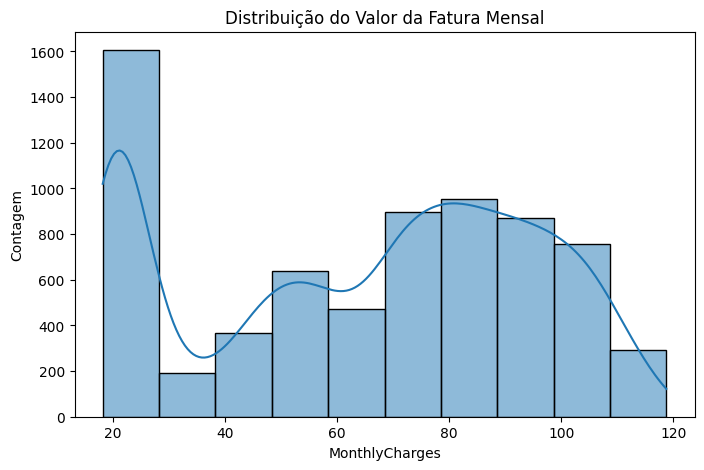

In [152]:
plt.figure(figsize=(8, 5))
sns.histplot(
    x=df_churn["MonthlyCharges"],
    bins=10,
    kde=True
)
plt.title("Distribuição do Valor da Fatura Mensal")
plt.xlabel("MonthlyCharges")
plt.ylabel("Contagem")
plt.show()

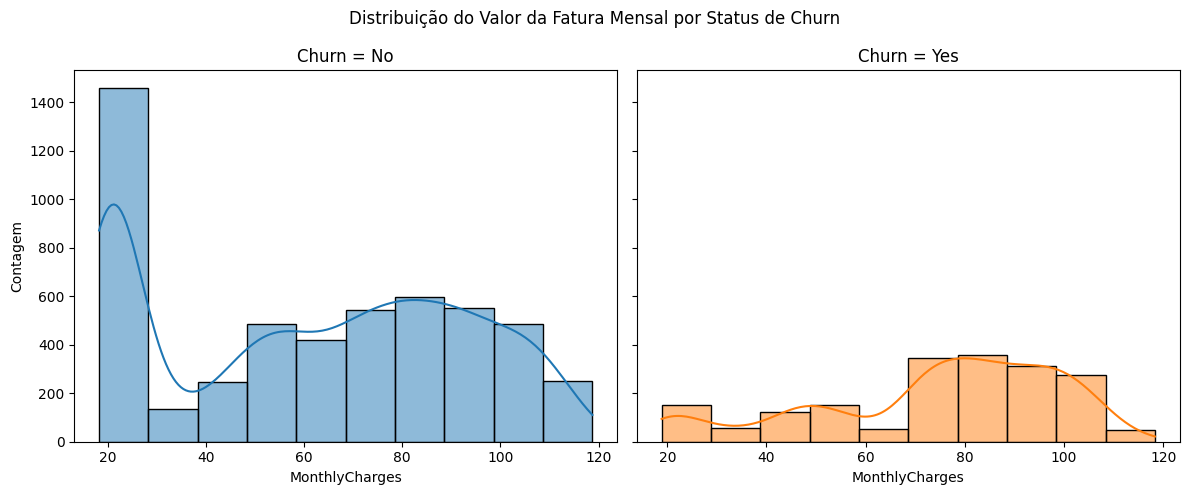

In [153]:
cores = sns.color_palette("tab10")

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.histplot(
    x=df_churn.loc[df_churn["Churn"] == "No", "MonthlyCharges"],
    bins=10,
    color=cores[0],
    kde=True,
    ax=axes[0]
)
axes[0].set_title("Churn = No")
axes[0].set_xlabel("MonthlyCharges")
axes[0].set_ylabel("Contagem")

sns.histplot(
    x=df_churn.loc[df_churn["Churn"] == "Yes", "MonthlyCharges"],
    bins=10,
    color=cores[1],
    kde=True,
    ax=axes[1]
)
axes[1].set_title("Churn = Yes")
axes[1].set_xlabel("MonthlyCharges")
axes[1].set_ylabel("Contagem")

fig.suptitle("Distribuição do Valor da Fatura Mensal por Status de Churn")
plt.tight_layout()
plt.show()


Realização de um agrupamento por faixas de Pagamento Mensal para tentar obter mais informações.

In [154]:
df_churn["MonthlyCharges_group"] = pd.cut(df_churn["MonthlyCharges"],
                                bins=[0, 30, 60, 90,120],
                                labels=["0-30", "30-60", "60-90", "90-120"],
                                right=True)

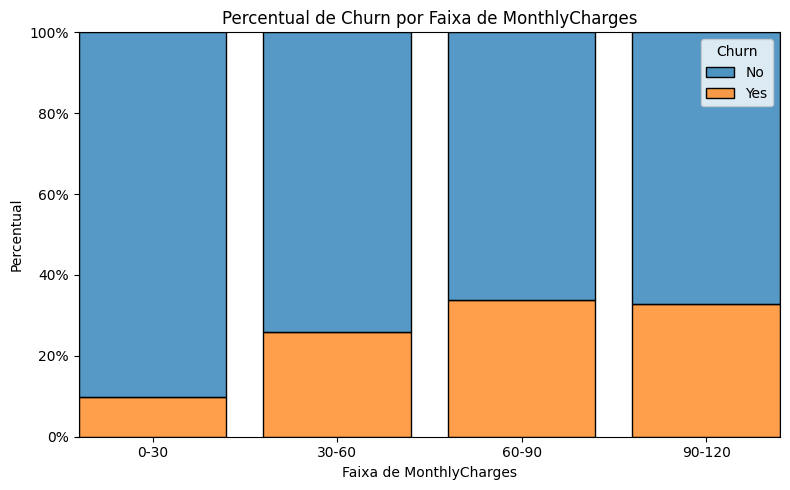

In [155]:
from matplotlib.ticker import PercentFormatter

plt.figure(figsize=(8, 5))
sns.histplot(
    data=df_churn,
    x="MonthlyCharges_group",
    hue="Churn",
    multiple="fill",
    palette="tab10",
    shrink=0.8,
    legend=True
)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title("Percentual de Churn por Faixa de MonthlyCharges")
plt.xlabel("Faixa de MonthlyCharges")
plt.ylabel("Percentual")
plt.tight_layout()
plt.show()


Possivel notar que com o aumento da faixa de valor a % de abandono do contrato tambem aumenta.

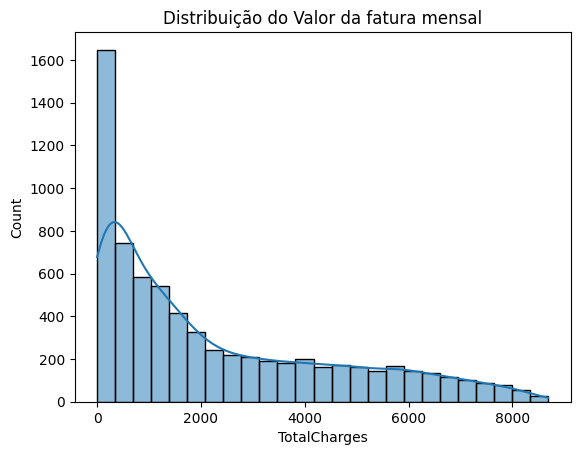

In [156]:
sns.histplot(df_churn['TotalCharges'], kde=True)
plt.title('Distribuição do Valor da fatura mensal')
plt.show()

In [157]:
df_churn["TotalCharges"].max()

8684.8

In [158]:
df_churn["TotalCharges_group"] = pd.cut(df_churn["TotalCharges"],
                                bins=[0, 2000, 4000, 6000,8700],
                                labels=["0-2000", "2000-4000", "4000-6000", "6000-8700"],
                                right=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


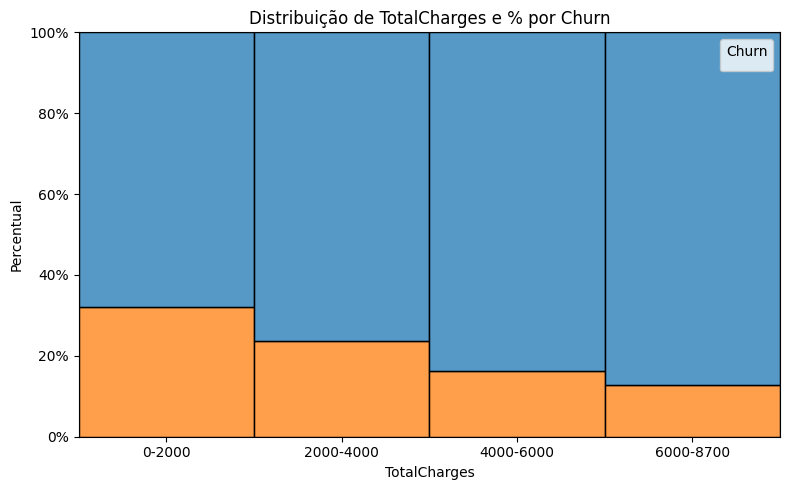

In [159]:
plt.figure(figsize=(8, 5))
sns.histplot(
    data=df_churn,
    x="TotalCharges_group",
    hue="Churn",
    palette="tab10",
    multiple="fill",
    bins=10,
    legend=True
)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title("Distribuição de TotalCharges e % por Churn")
plt.xlabel("TotalCharges")
plt.ylabel("Percentual")
plt.legend(title="Churn")
plt.tight_layout()
plt.show()



=== Análise da Coluna: gender ===
Frequência Absoluta:
gender
Male      3555
Female    3488
Name: count, dtype: int64

Frequência Relativa (%):
gender
Male      50.48
Female    49.52
Name: proportion, dtype: float64


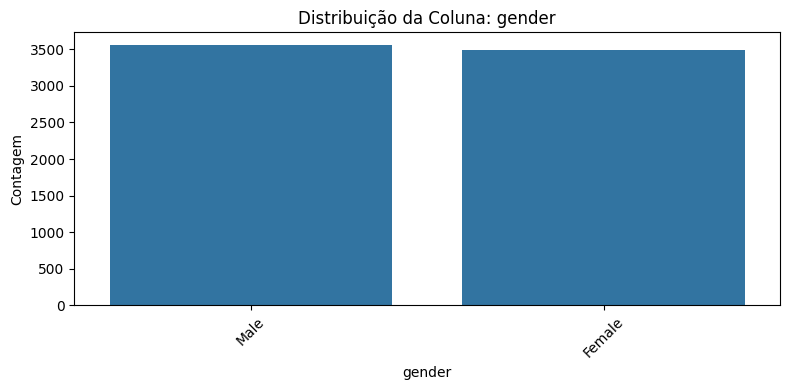


Número de categorias únicas em 'gender': 2

=== Análise da Coluna: Partner ===
Frequência Absoluta:
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Frequência Relativa (%):
Partner
No     51.7
Yes    48.3
Name: proportion, dtype: float64


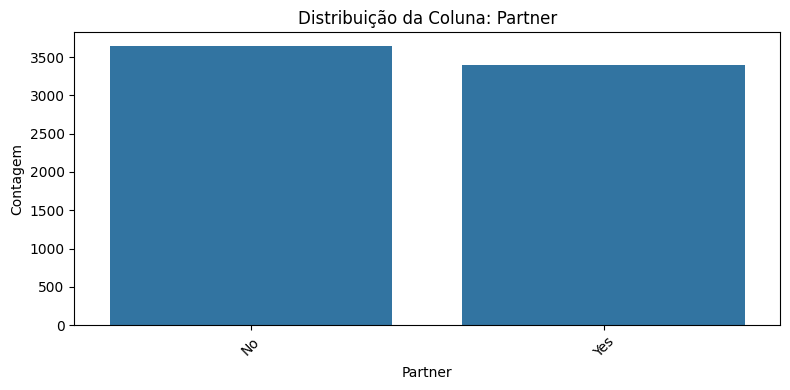


Número de categorias únicas em 'Partner': 2

=== Análise da Coluna: Dependents ===
Frequência Absoluta:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

Frequência Relativa (%):
Dependents
No     70.04
Yes    29.96
Name: proportion, dtype: float64


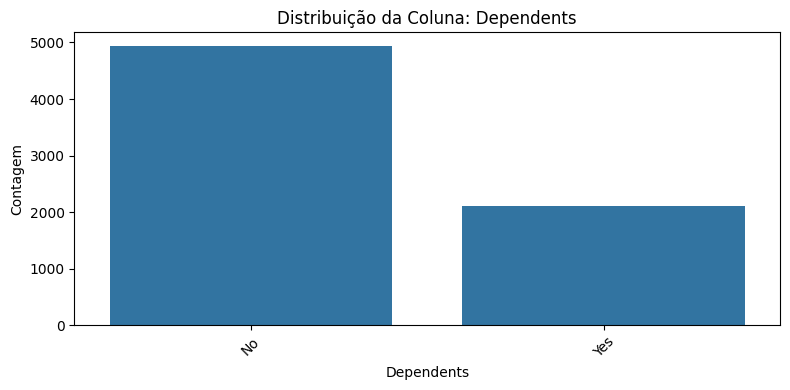


Número de categorias únicas em 'Dependents': 2

=== Análise da Coluna: PhoneService ===
Frequência Absoluta:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

Frequência Relativa (%):
PhoneService
Yes    90.32
No      9.68
Name: proportion, dtype: float64


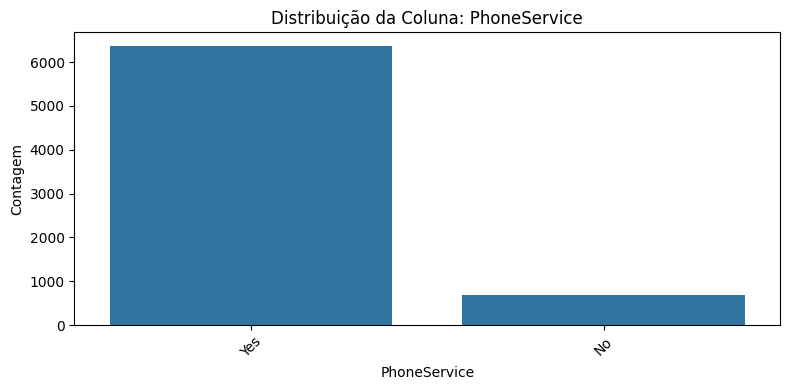


Número de categorias únicas em 'PhoneService': 2

=== Análise da Coluna: MultipleLines ===
Frequência Absoluta:
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

Frequência Relativa (%):
MultipleLines
No                  48.13
Yes                 42.18
No phone service     9.68
Name: proportion, dtype: float64


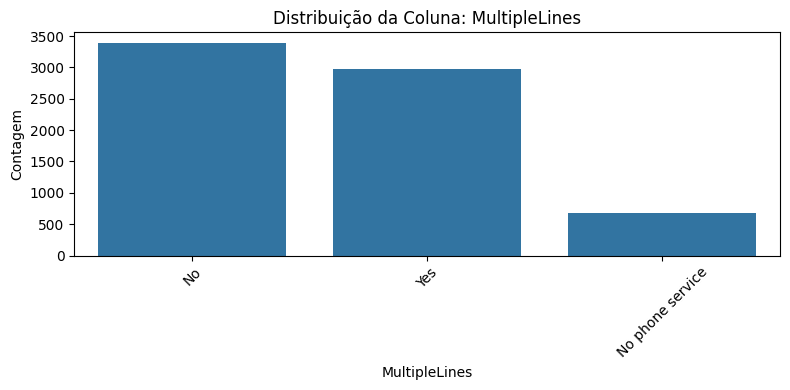


Número de categorias únicas em 'MultipleLines': 3

=== Análise da Coluna: InternetService ===
Frequência Absoluta:
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

Frequência Relativa (%):
InternetService
Fiber optic    43.96
DSL            34.37
No             21.67
Name: proportion, dtype: float64


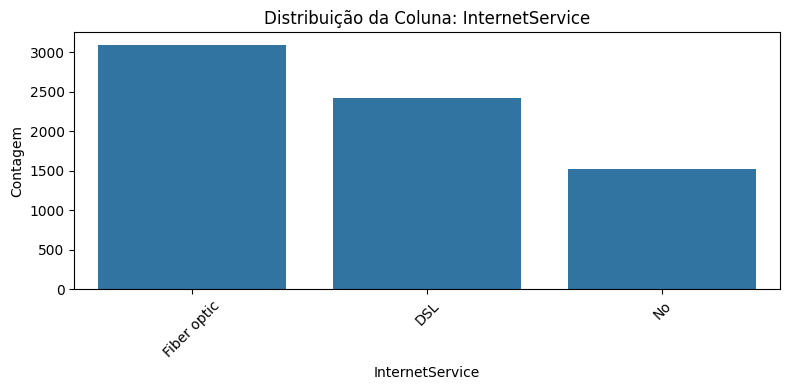


Número de categorias únicas em 'InternetService': 3

=== Análise da Coluna: OnlineSecurity ===
Frequência Absoluta:
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

Frequência Relativa (%):
OnlineSecurity
No                     49.67
Yes                    28.67
No internet service    21.67
Name: proportion, dtype: float64


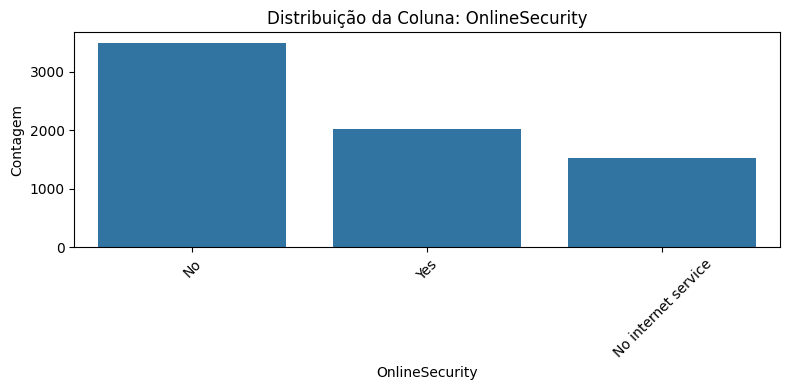


Número de categorias únicas em 'OnlineSecurity': 3

=== Análise da Coluna: OnlineBackup ===
Frequência Absoluta:
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

Frequência Relativa (%):
OnlineBackup
No                     43.84
Yes                    34.49
No internet service    21.67
Name: proportion, dtype: float64


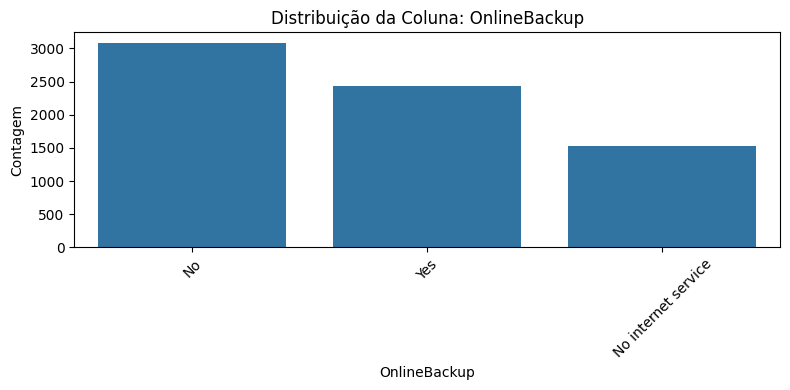


Número de categorias únicas em 'OnlineBackup': 3

=== Análise da Coluna: DeviceProtection ===
Frequência Absoluta:
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

Frequência Relativa (%):
DeviceProtection
No                     43.94
Yes                    34.39
No internet service    21.67
Name: proportion, dtype: float64


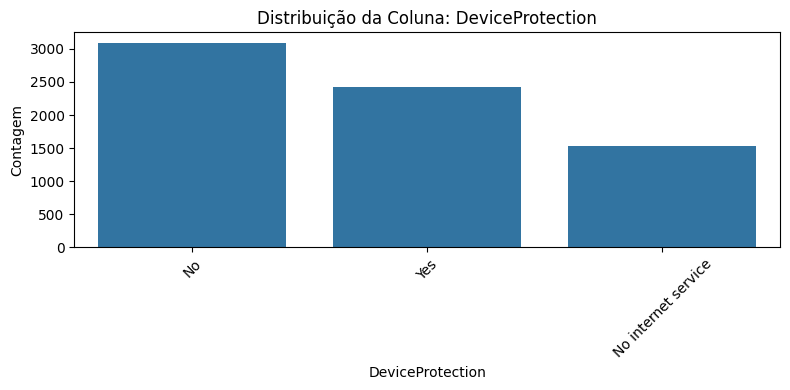


Número de categorias únicas em 'DeviceProtection': 3

=== Análise da Coluna: TechSupport ===
Frequência Absoluta:
TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

Frequência Relativa (%):
TechSupport
No                     49.31
Yes                    29.02
No internet service    21.67
Name: proportion, dtype: float64


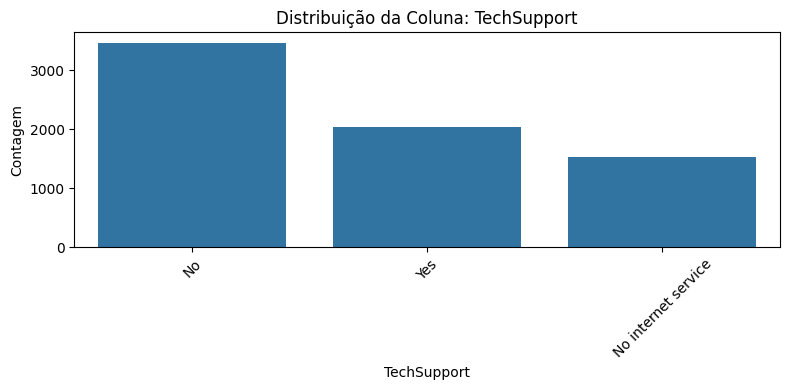


Número de categorias únicas em 'TechSupport': 3

=== Análise da Coluna: StreamingTV ===
Frequência Absoluta:
StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

Frequência Relativa (%):
StreamingTV
No                     39.90
Yes                    38.44
No internet service    21.67
Name: proportion, dtype: float64


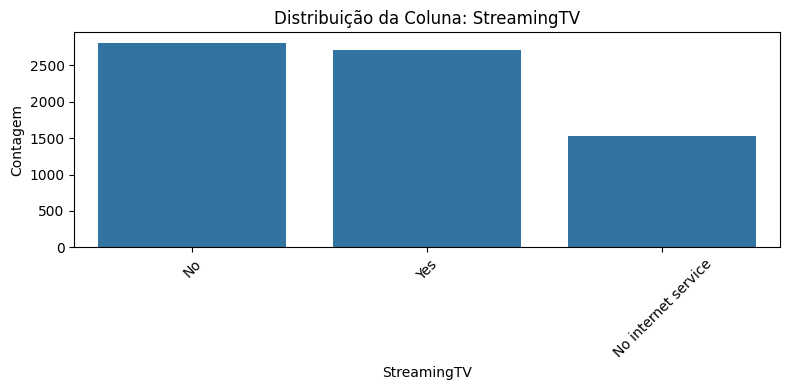


Número de categorias únicas em 'StreamingTV': 3

=== Análise da Coluna: StreamingMovies ===
Frequência Absoluta:
StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64

Frequência Relativa (%):
StreamingMovies
No                     39.54
Yes                    38.79
No internet service    21.67
Name: proportion, dtype: float64


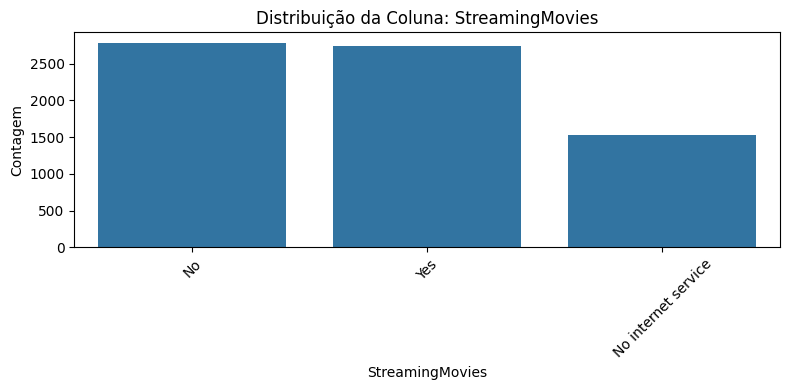


Número de categorias únicas em 'StreamingMovies': 3

=== Análise da Coluna: Contract ===
Frequência Absoluta:
Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

Frequência Relativa (%):
Contract
Month-to-month    55.02
Two year          24.07
One year          20.91
Name: proportion, dtype: float64


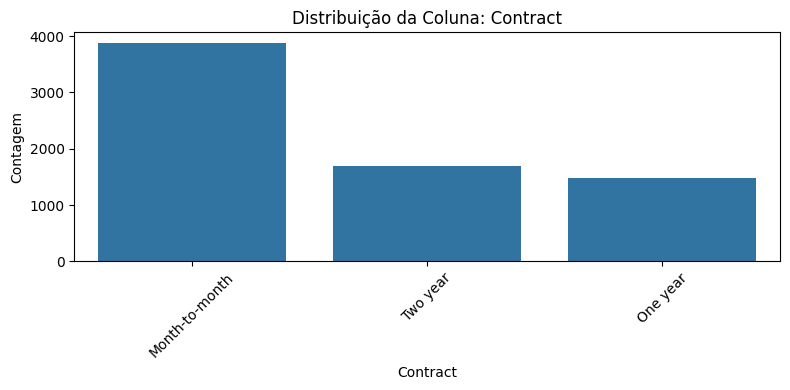


Número de categorias únicas em 'Contract': 3

=== Análise da Coluna: PaperlessBilling ===
Frequência Absoluta:
PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64

Frequência Relativa (%):
PaperlessBilling
Yes    59.22
No     40.78
Name: proportion, dtype: float64


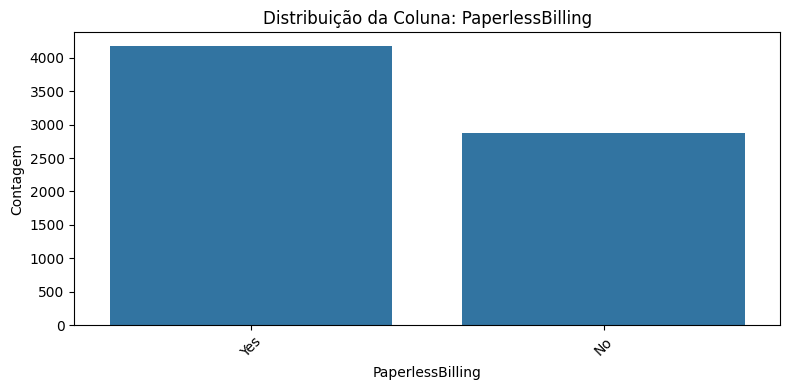


Número de categorias únicas em 'PaperlessBilling': 2

=== Análise da Coluna: PaymentMethod ===
Frequência Absoluta:
PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

Frequência Relativa (%):
PaymentMethod
Electronic check             33.58
Mailed check                 22.89
Bank transfer (automatic)    21.92
Credit card (automatic)      21.61
Name: proportion, dtype: float64


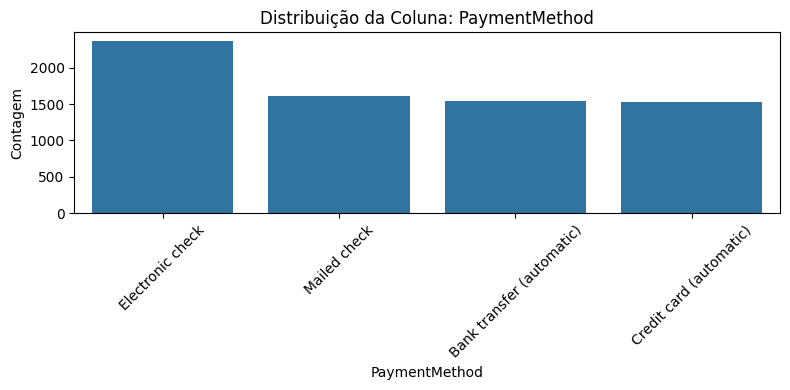


Número de categorias únicas em 'PaymentMethod': 4

=== Análise da Coluna: Churn ===
Frequência Absoluta:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Frequência Relativa (%):
Churn
No     73.46
Yes    26.54
Name: proportion, dtype: float64


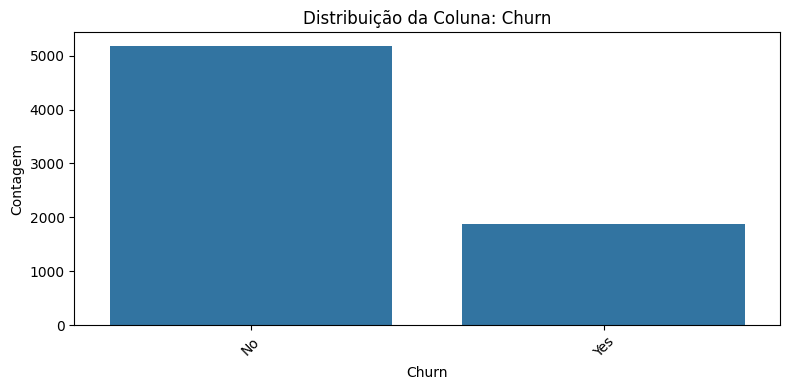

In [ ]:
# Seleciona as colunas categóricas
categorical_cols = df_churn.select_dtypes(include=['object', 'category']).columns

# Loop para analisar cada coluna categórica
for col in categorical_cols:
    print(f"\n=== Análise da Coluna: {col} ===")
    
    # Frequência absoluta
    freq_abs = df_churn[col].value_counts()
    print("Frequência Absoluta:")
    print(freq_abs)
    
    # Frequência relativa (em porcentagem)
    freq_rel = df_churn[col].value_counts(normalize=True) * 100
    print("\nFrequência Relativa (%):")
    print(freq_rel.round(2))
    
    # Visualização: gráfico de barras
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df_churn, x=col, order=freq_abs.index)
    plt.title(f'Distribuição da Coluna: {col}')
    plt.xlabel(col)
    plt.ylabel("Contagem")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Se desejar, também pode avaliar a cardinalidade
    print(f"\nNúmero de categorias únicas em '{col}': {df_churn[col].nunique()}")


=== Análise da Coluna: gender ===


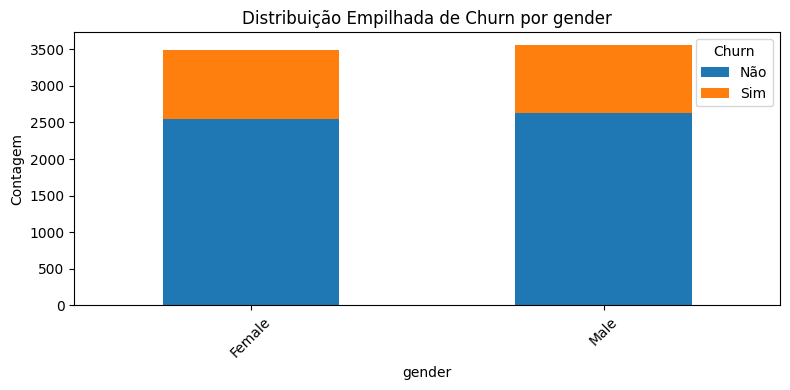


=== Análise da Coluna: Partner ===


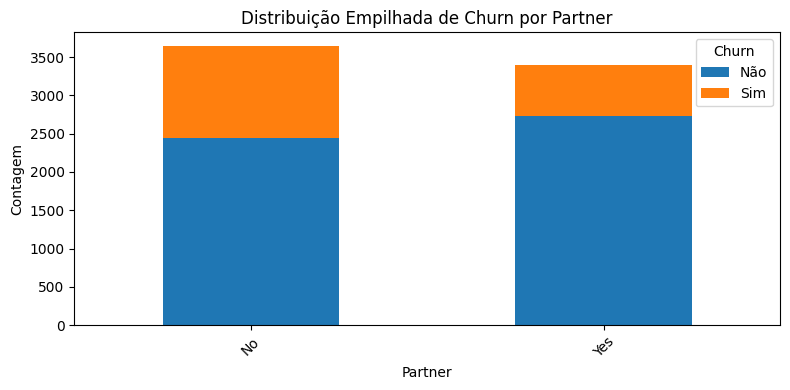


=== Análise da Coluna: Dependents ===


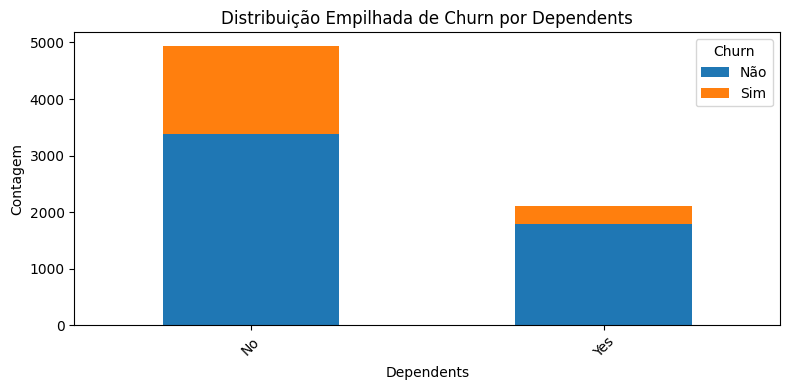


=== Análise da Coluna: PhoneService ===


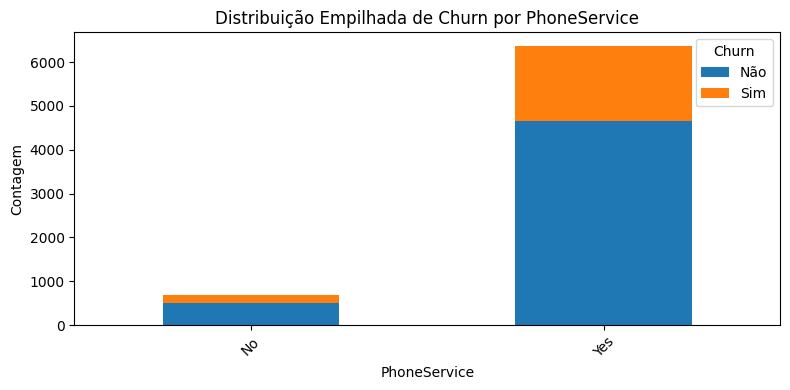


=== Análise da Coluna: MultipleLines ===


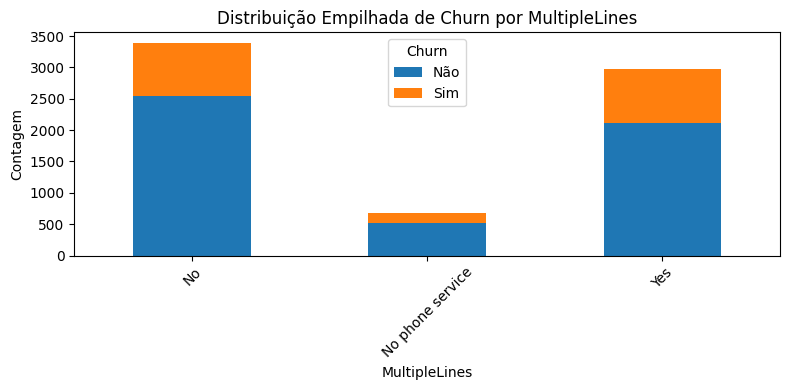


=== Análise da Coluna: InternetService ===


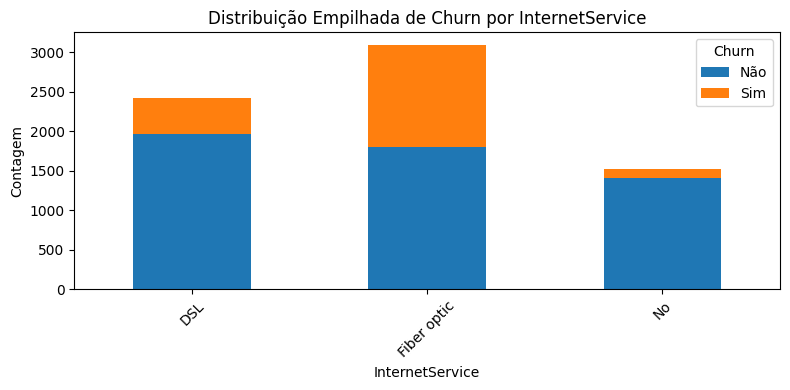


=== Análise da Coluna: OnlineSecurity ===


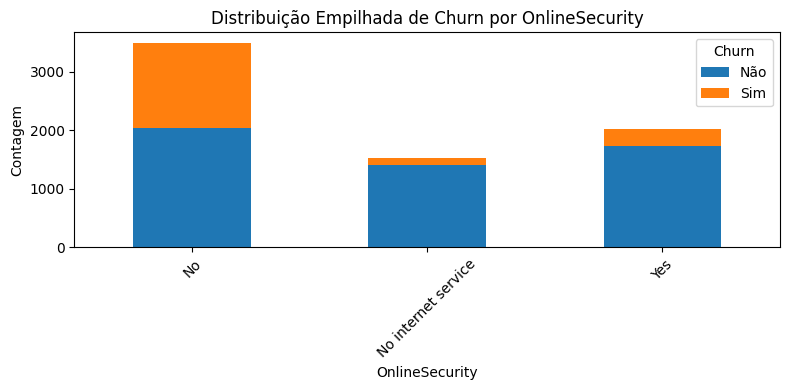


=== Análise da Coluna: OnlineBackup ===


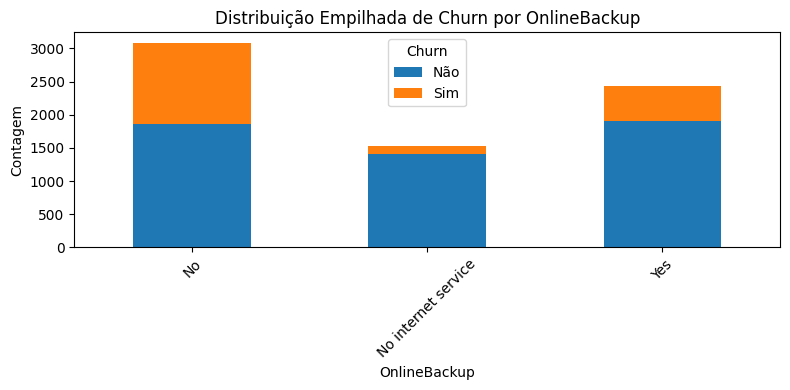


=== Análise da Coluna: DeviceProtection ===


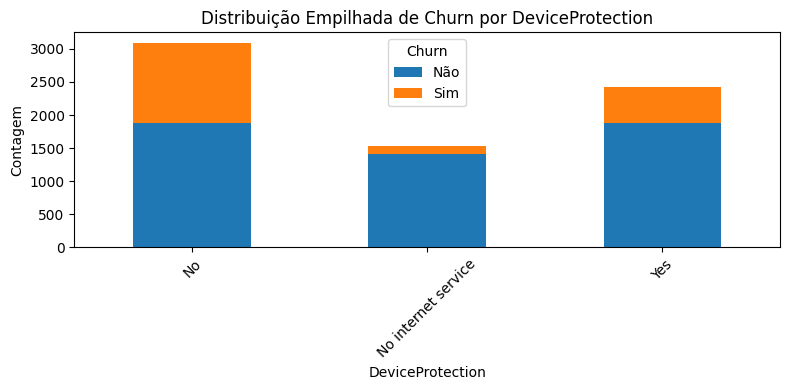


=== Análise da Coluna: TechSupport ===


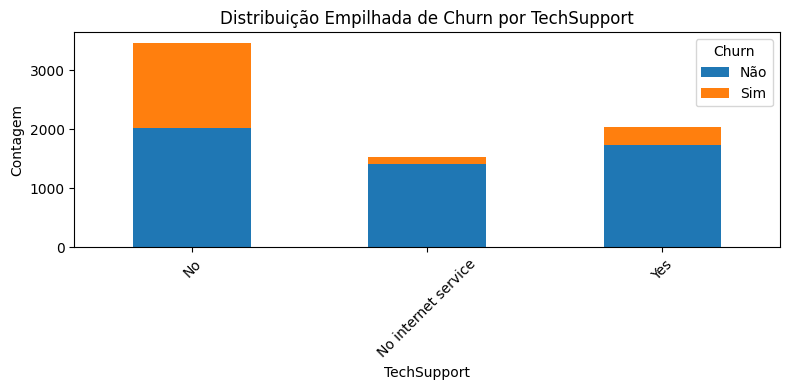


=== Análise da Coluna: StreamingTV ===


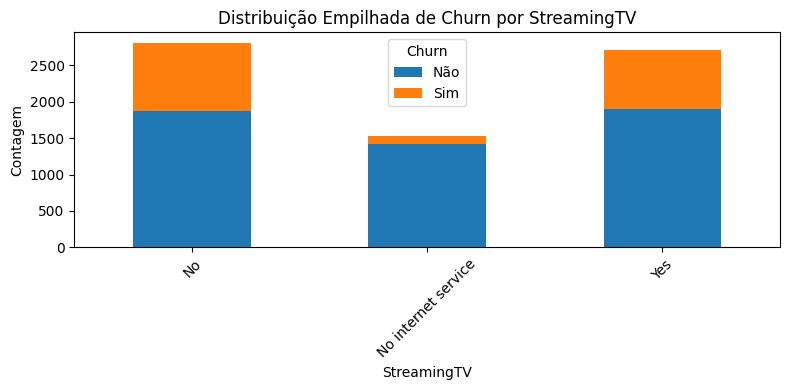


=== Análise da Coluna: StreamingMovies ===


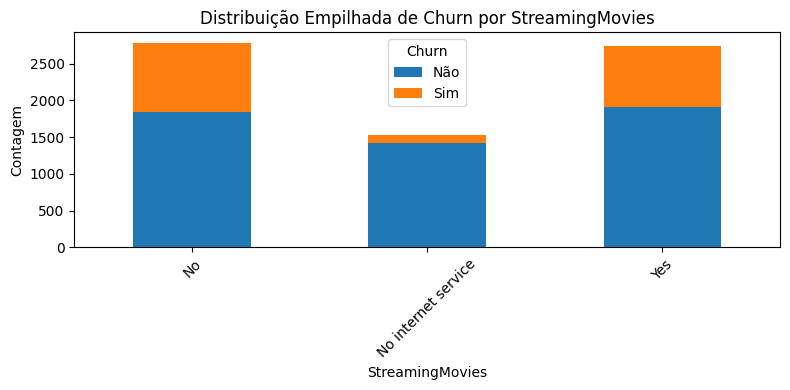


=== Análise da Coluna: Contract ===


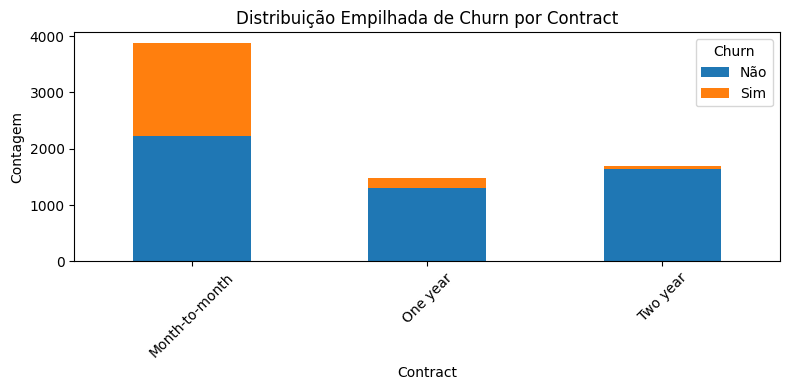


=== Análise da Coluna: PaperlessBilling ===


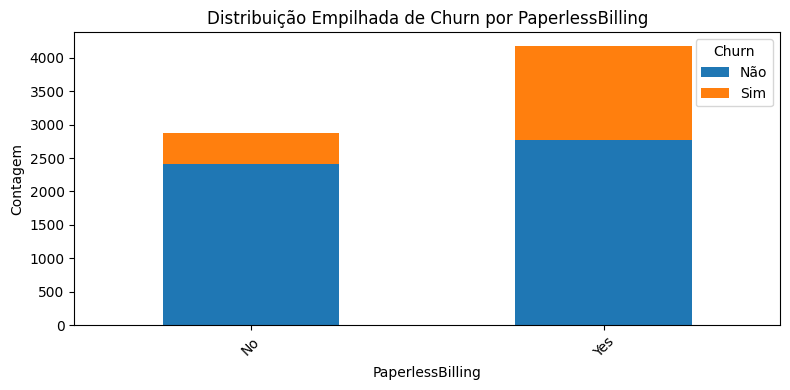


=== Análise da Coluna: PaymentMethod ===


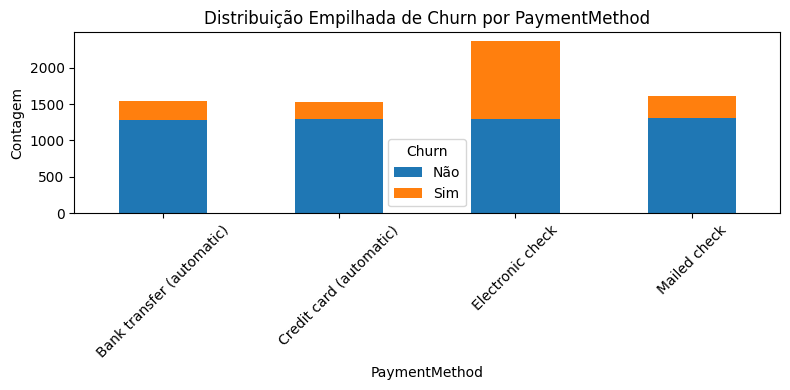

In [ ]:
# Seleciona as colunas categóricas (exceto a coluna target, se necessário)
categorical_cols = df_churn.select_dtypes(include=['object', 'category']).columns.drop('Churn', errors='ignore')

for col in categorical_cols:
    print(f"\n=== Análise da Coluna: {col} ===")
    
    # Cria uma tabela de contingência entre a coluna categórica e o target Churn
    crosstab = pd.crosstab(df_churn[col], df_churn['Churn'])
    
    # Plota o gráfico de barras empilhadas
    crosstab.plot(kind='bar', stacked=True, figsize=(8, 4))
    plt.title(f'Distribuição Empilhada de Churn por {col}')
    plt.xlabel(col)
    plt.ylabel("Contagem")
    plt.xticks(rotation=45)
    plt.legend(title='Churn', labels=['Não', 'Sim'])
    plt.tight_layout()
    plt.show()